In [112]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from matplotlib import pyplot as plt


features_count = 19

train = pd.read_csv("data/segmentation_target.test")
test = pd.read_csv("data/segmentation_target.data")

train.values

array([[110.        , 189.        ,   9.        , ...,   0.50813884,
          1.9108642 ,   0.        ],
       [ 86.        , 187.        ,   9.        , ...,   0.46332908,
          1.9414649 ,   0.        ],
       [225.        , 244.        ,   9.        , ...,   0.48014903,
          1.9879022 ,   0.        ],
       ...,
       [128.        , 161.        ,   9.        , ...,   0.5409177 ,
         -1.9963073 ,   3.        ],
       [150.        , 158.        ,   9.        , ...,   0.50308645,
         -1.9434487 ,   3.        ],
       [124.        , 162.        ,   9.        , ...,   0.4799313 ,
         -2.0293121 ,   3.        ]])

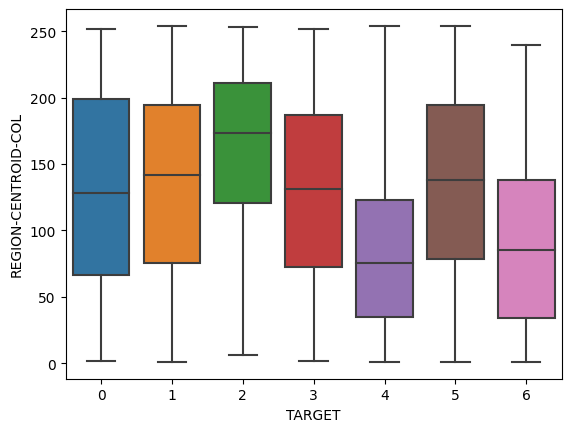

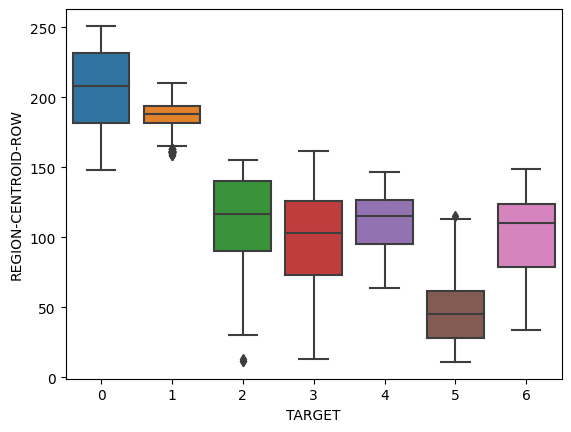

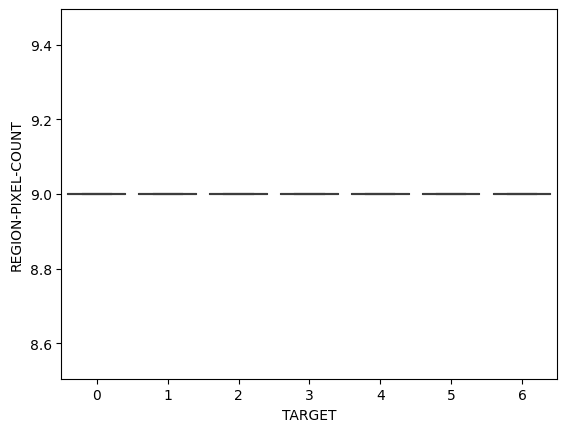

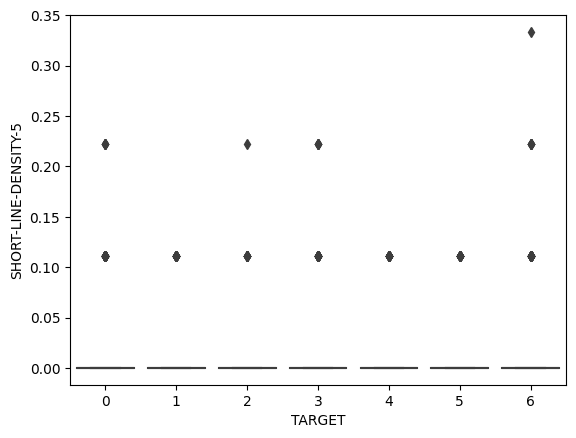

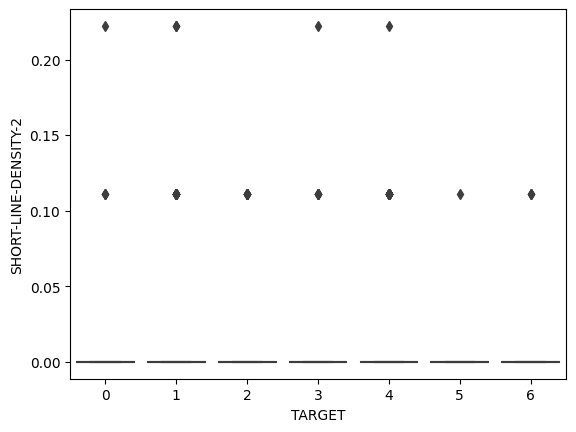

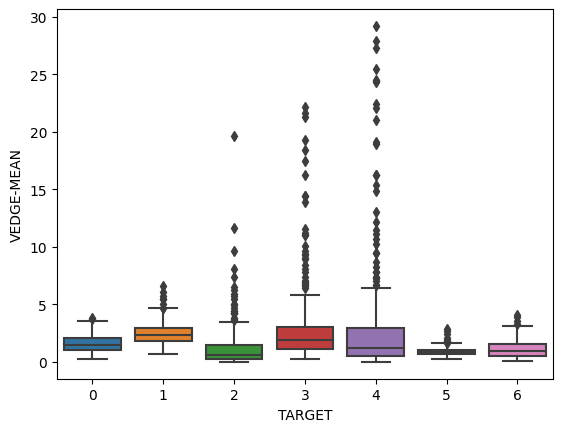

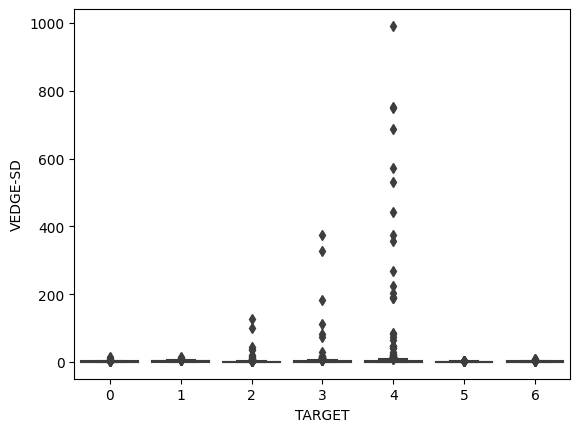

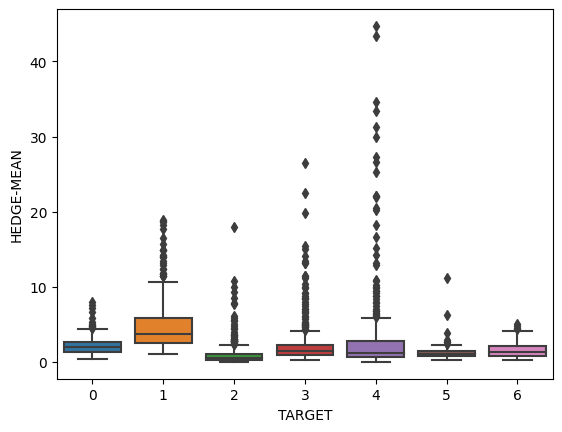

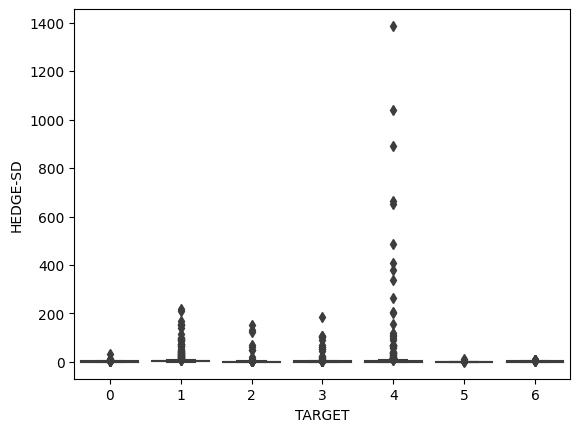

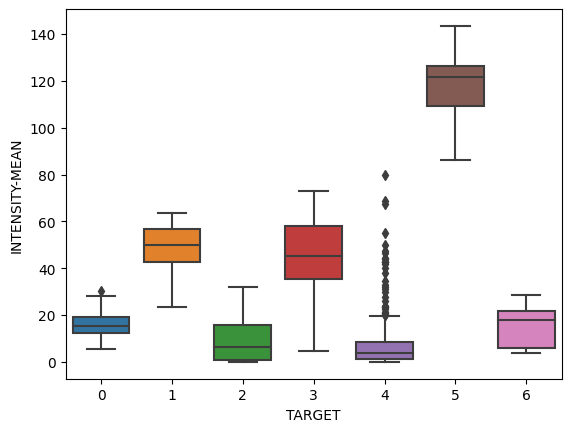

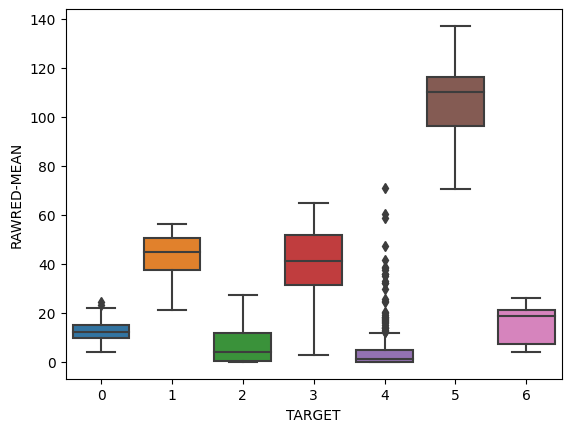

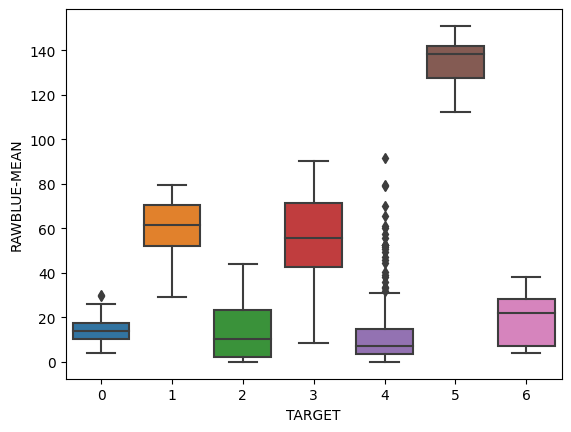

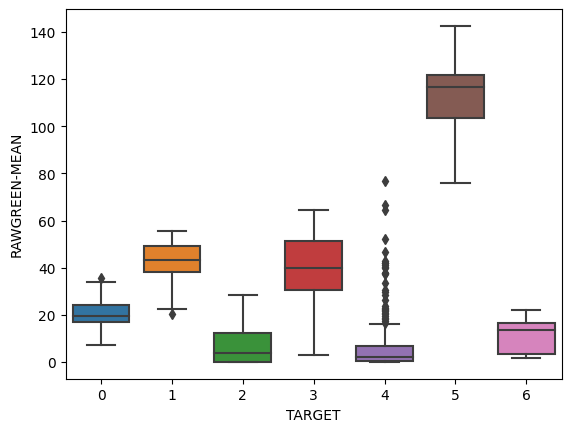

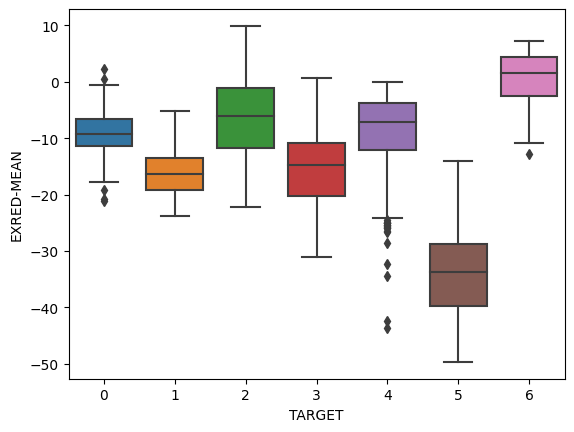

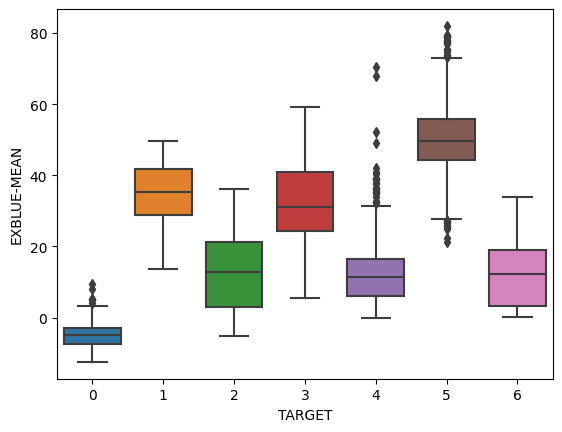

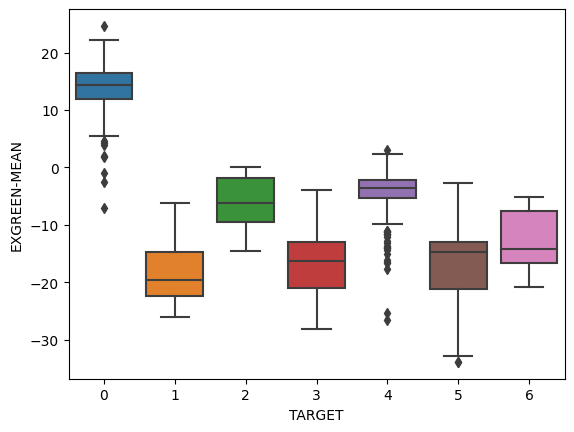

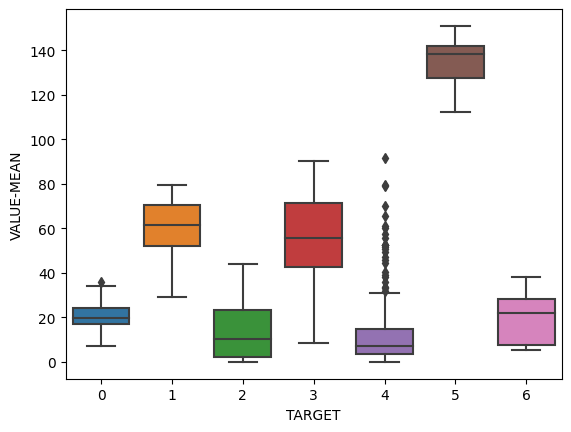

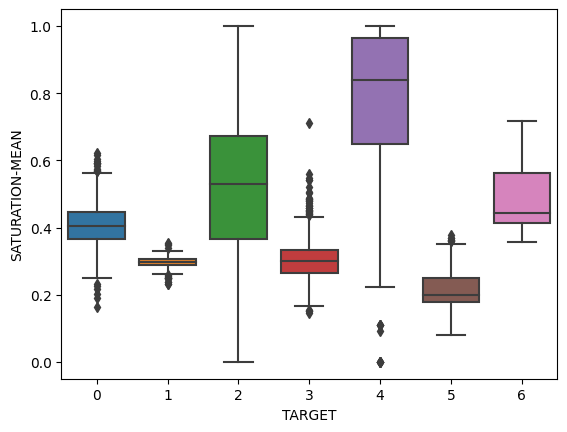

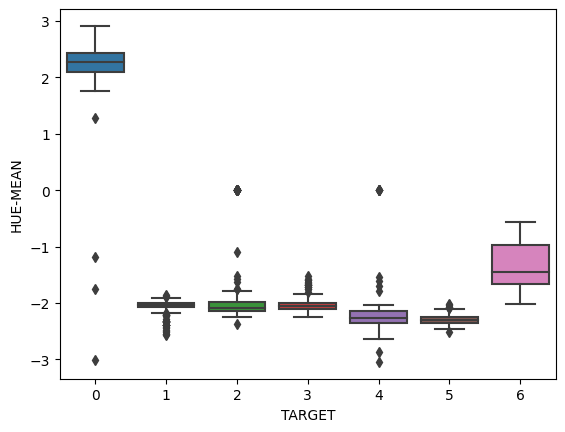

In [113]:
import seaborn

column_names = [
                'REGION-CENTROID-COL',
                'REGION-CENTROID-ROW',
                'REGION-PIXEL-COUNT',
                'SHORT-LINE-DENSITY-5',
                'SHORT-LINE-DENSITY-2',
                'VEDGE-MEAN',
                'VEDGE-SD',
                'HEDGE-MEAN',
                'HEDGE-SD',
                'INTENSITY-MEAN',
                'RAWRED-MEAN',
                'RAWBLUE-MEAN',
                'RAWGREEN-MEAN',
                'EXRED-MEAN',
                'EXBLUE-MEAN',
                'EXGREEN-MEAN',
                'VALUE-MEAN',
                'SATURATION-MEAN',
                'HUE-MEAN',
                ]

for i in column_names:
    seaborn.boxplot(x='TARGET',y=i,data=train)
    plt.show()

Признаки
REGION-PIXEL-COUNT
SHORT-LINE-DENSITY-5
SHORT-LINE-DENSITY-2
Можно выбросить, т. к. они не имеют смысла

<Axes: >

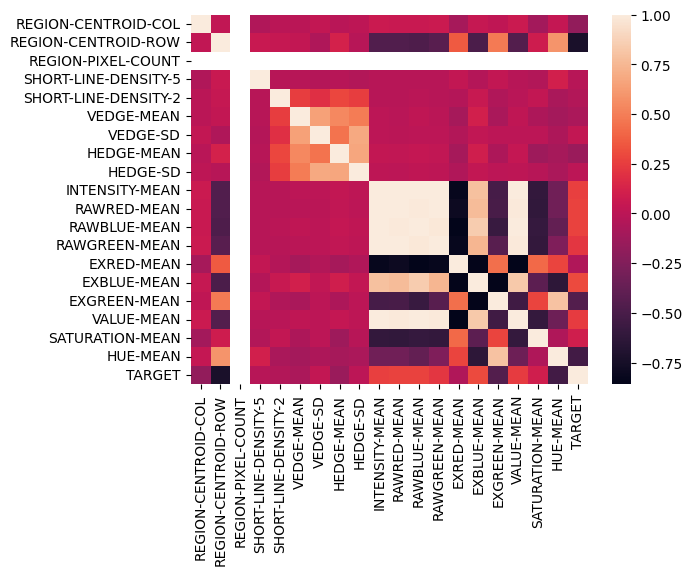

In [114]:
seaborn.heatmap(train.corr(), annot=False)

Признаки
RAWRED-MEAN
RAWBLUE-MEAN
RAWGREEN-MEAN
Можно выбросить, т. к. они коррелируют друг с другом и с признаком
INTENSITY-MEAN

In [115]:
train.pop("REGION-PIXEL-COUNT")
test.pop("REGION-PIXEL-COUNT")
features_count -= 1

# train.pop("SHORT-LINE-DENSITY-5")
# test.pop("SHORT-LINE-DENSITY-5")
# features_count -= 1
#
# train.pop("SHORT-LINE-DENSITY-2")
# test.pop("SHORT-LINE-DENSITY-2")
# features_count -= 1

# train.pop("RAWRED-MEAN")
# test.pop("RAWRED-MEAN")
# features_count -= 1
#
# train.pop("RAWBLUE-MEAN")
# test.pop("RAWBLUE-MEAN")
# features_count -= 1
#
# train.pop("RAWGREEN-MEAN")
# test.pop("RAWGREEN-MEAN")
# features_count -= 1

<Axes: >

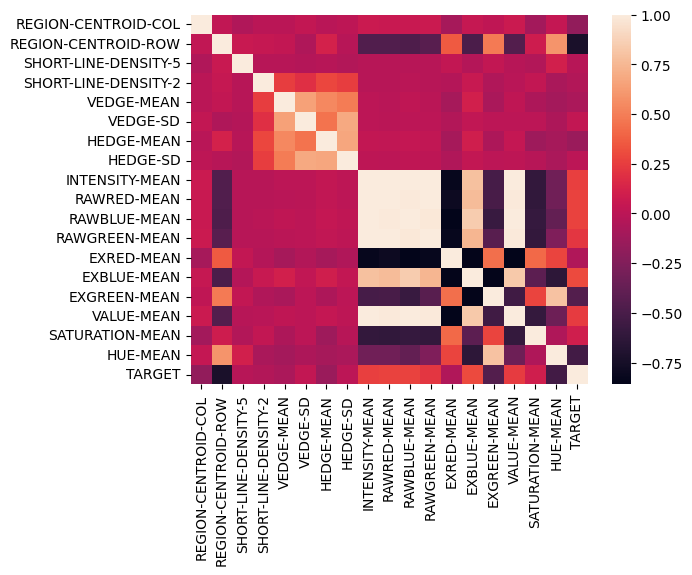

In [116]:
seaborn.heatmap(train.corr(), annot=False)

In [104]:
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(features_count,)))
model.add(tf.keras.layers.Dense(40, activation=keras.activations.sigmoid))
model.add(tf.keras.layers.Dense(40, activation=keras.activations.sigmoid))
model.add(tf.keras.layers.Dense(20, activation=keras.activations.sigmoid))
model.add(tf.keras.layers.Dense(10, activation=keras.activations.sigmoid))
model.add(tf.keras.layers.Dense(7,activation='sigmoid'))

model.compile("adam", loss=keras.losses.CategoricalCrossentropy(), metrics=["accuracy", "categorical_accuracy"])

In [105]:
from sklearn.model_selection import train_test_split

train_dataset = train.values

X = train_dataset[:, 0:features_count].astype(float)

print(X)

labels_cat = keras.utils.to_categorical(train_dataset[:, features_count])
Y = labels_cat
print(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.25)

[[ 1.1000000e+02  1.8900000e+02  0.0000000e+00 ...  1.8666668e+01
   5.0813884e-01  1.9108642e+00]
 [ 8.6000000e+01  1.8700000e+02  0.0000000e+00 ...  1.9222221e+01
   4.6332908e-01  1.9414649e+00]
 [ 2.2500000e+02  2.4400000e+02  0.0000000e+00 ...  1.7111110e+01
   4.8014903e-01  1.9879022e+00]
 ...
 [ 1.2800000e+02  1.6100000e+02  0.0000000e+00 ...  1.0888889e+01
   5.4091770e-01 -1.9963073e+00]
 [ 1.5000000e+02  1.5800000e+02  0.0000000e+00 ...  1.2222222e+01
   5.0308645e-01 -1.9434487e+00]
 [ 1.2400000e+02  1.6200000e+02  1.1111111e-01 ...  1.4555555e+01
   4.7993130e-01 -2.0293121e+00]]
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [106]:
history = model.fit(
    X_train, Y_train, validation_data=(X_test, Y_test), epochs=200
)

Epoch 1/200
50/50 [==============================] - 1s 5ms/step - loss: 1.9509 - accuracy: 0.1460 - categorical_accuracy: 0.1460 - val_loss: 1.9324 - val_accuracy: 0.1505 - val_categorical_accuracy: 0.1505
Epoch 2/200
50/50 [==============================] - 0s 3ms/step - loss: 1.9221 - accuracy: 0.2216 - categorical_accuracy: 0.2216 - val_loss: 1.8933 - val_accuracy: 0.3524 - val_categorical_accuracy: 0.3524
Epoch 3/200
50/50 [==============================] - 0s 3ms/step - loss: 1.8659 - accuracy: 0.3581 - categorical_accuracy: 0.3581 - val_loss: 1.8078 - val_accuracy: 0.3029 - val_categorical_accuracy: 0.3029
Epoch 4/200
50/50 [==============================] - 0s 3ms/step - loss: 1.7788 - accuracy: 0.2990 - categorical_accuracy: 0.2990 - val_loss: 1.7167 - val_accuracy: 0.3124 - val_categorical_accuracy: 0.3124
Epoch 5/200
50/50 [==============================] - 0s 2ms/step - loss: 1.7069 - accuracy: 0.2940 - categorical_accuracy: 0.2940 - val_loss: 1.6503 - val_accuracy: 0.3200 

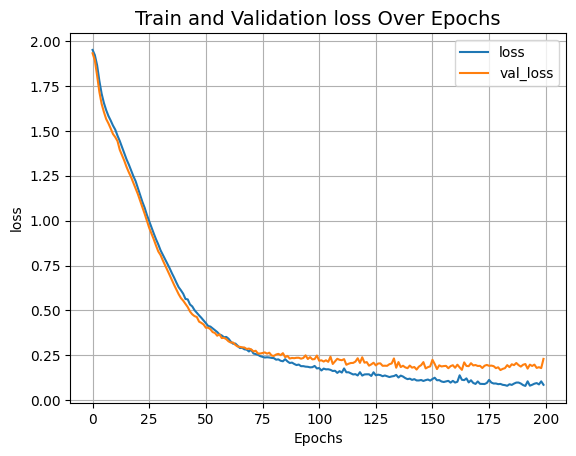

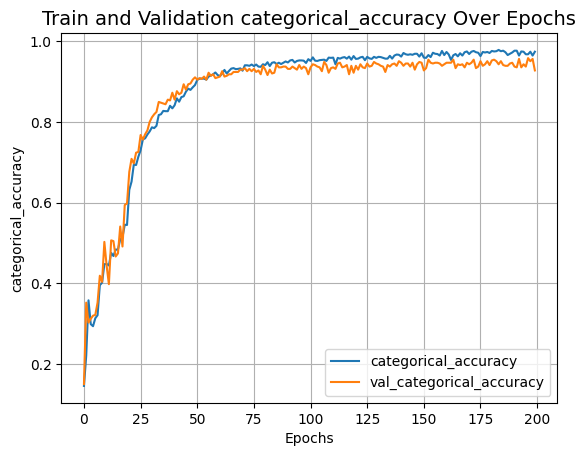

In [107]:
def plot_result(item):
    plt.plot(history.history[item], label=item)
    plt.plot(history.history["val_" + item], label="val_" + item)
    plt.xlabel("Epochs")
    plt.ylabel(item)
    plt.title("Train and Validation {} Over Epochs".format(item), fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()


plot_result("loss")
plot_result("categorical_accuracy")

In [108]:
test_dataset = test.values

X = test_dataset[:, 0:features_count].astype(float)

print(X)

labels_cat = keras.utils.to_categorical(test_dataset[:, features_count])
Y = labels_cat
print(Y)

X1 = X
Y1 = Y

[[ 1.4000000e+02  1.2500000e+02  0.0000000e+00 ...  7.7777777e+00
   5.4563490e-01 -1.1218182e+00]
 [ 1.8800000e+02  1.3300000e+02  0.0000000e+00 ...  8.4444450e+00
   5.3858024e-01 -9.2481726e-01]
 [ 1.0500000e+02  1.3900000e+02  0.0000000e+00 ...  7.5555553e+00
   5.3262790e-01 -9.6594584e-01]
 ...
 [ 1.9700000e+02  2.3600000e+02  0.0000000e+00 ...  1.8555555e+01
   2.9272884e-01  2.7898002e+00]
 [ 2.0800000e+02  2.4000000e+02  1.1111111e-01 ...  1.8555555e+01
   4.2162097e-01  2.3924873e+00]
 [ 2.2300000e+02  1.8500000e+02  0.0000000e+00 ...  1.7555555e+01
   4.4541803e-01  1.8388497e+00]]
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [109]:
from sklearn.metrics import classification_report

pred = model(X1)
pred = (pred > 0.9)
print(classification_report(Y1,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       0.96      0.90      0.93        30
           2       0.89      0.83      0.86        30
           3       0.89      0.80      0.84        30
           4       1.00      0.83      0.91        30
           5       1.00      1.00      1.00        30
           6       1.00      0.97      0.98        30

   micro avg       0.96      0.90      0.93       210
   macro avg       0.96      0.90      0.93       210
weighted avg       0.96      0.90      0.93       210
 samples avg       0.90      0.90      0.90       210



C:\Users\Kirill\PycharmProjects\VKEdu\venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [110]:
pred = model(X_train)
pred = (pred > 0.9)
print(classification_report(Y_train,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       0.99      0.95      0.97       216
           2       0.93      0.80      0.86       229
           3       0.93      0.89      0.91       226
           4       0.99      0.84      0.91       235
           5       1.00      0.99      1.00       217
           6       1.00      0.99      0.99       223

   micro avg       0.98      0.92      0.95      1575
   macro avg       0.98      0.92      0.95      1575
weighted avg       0.98      0.92      0.95      1575
 samples avg       0.92      0.92      0.92      1575



C:\Users\Kirill\PycharmProjects\VKEdu\venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
